## **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [1]:
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2
# Plot figures "inline" with other output
%matplotlib inline

# Most important package
import numpy as np

# The reinforcement learning environment
from gridworld import GridWorld

# Configure nice figures
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(14,7)

### ***! IMPORTANT NOTE !***

Your implementation should only use the `numpy` (`np`) module. The `numpy` module provides all the functionality you need for this assignment and makes it easier debuging your code. No other modules, e.g. `scikit-learn` or `scipy` among others, are allowed and solutions using modules other than `numpy` will be sent for re-submission. You can find everything you need about `numpy` in the official [documentation](https://numpy.org/doc/stable/).

---
## **1. Reinforcement Learning, introduction**
In the previous assignments we have explored supervised learning, in other words, methods that train a model based on known inputs and targets. This time, we will instead look at a branch of machine learning that is much closer to the intuitive notion of "learning". Reinforcement learning, or RL for short, does not work with inputs and targets, but instead learns by performing **actions** in an **environment** and observing the generated **rewards**.

RL is a very broad concept and many different algorithms have been deviced based on these general concepts of actions and rewards. Perhaps the main advantage of RL over other machine learning techniques is that we do not explicitly tell the model what the right answer is (like we have done in the previous assignments), but instead only tell the model when the desired outcome has been acheived. This might seem like the same thing at first, but the key difference is that RL allows the model to device solutions that outperform the human teacher. This is usually not possible in traditional supervised learning since the model can only get as good as the training data (the teacher). With the freedom to explore new strategies, which is inherent to RL, this is no longer true and some truly astounding results have been acheved. The most famous example is probably AlphaGo, the first computer program to beat a human expert in the board game Go. [Here is an excellent documentary](https://youtu.be/WXuK6gekU1Y), if you have some time to spare. For those of you that want a quicker and more fun example, [here is a video about RL agents playing hide and seek](https://youtu.be/kopoLzvh5jY), which very clearly demonstrates the power of RL to invent new and hidden strategies.

Of course, these examples are from the very forefront of current research in RL, and are unfortunately too complex for this assignment. We will instead work on a much simpler problem, but the core concepts that you will implement and investigate here are the same that made the above possible.

### **1.1 Getting to know the environment interface**
To do this assignment you must first get familiar with the code interface to the environment, or "World", as we will call it. You will work with a special type of environment called a **GridWorld**. The GridWorld is, as the name suggests, a world where each state is represented by a square on a grid. To create an instance of a GridWorld, run the following code. You can change the input number to select a different world. You will work with worlds 1-4, but there are other optional worlds as well, which we encourage you to explore at the end of the notebook.

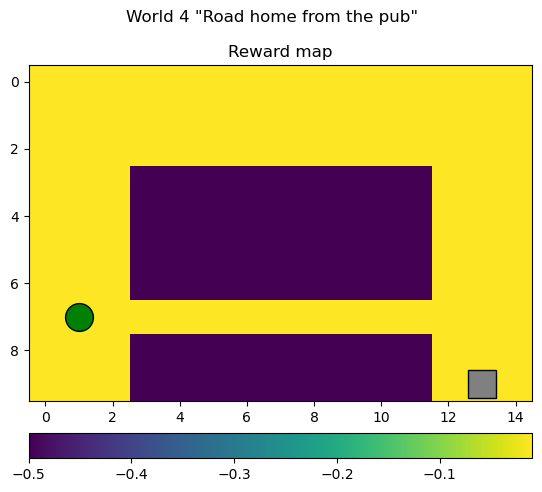

In [2]:
W = GridWorld(4)
W.init()
W.draw()

#### **<span style="color:red">Question 1:</span>**
The colored background represents the reward for entering each state. Notice that all rewards are negative. Can you think of why this is important?

#### **<span style="color:green">Answer:</span>**
\[As each state is given a value depending on the rewards. The reinforcement learning want to minimize the number of steps taken to maximize the rewards. This will results in an optimal path in order to get as high rewards as possible. If the rewards were not negative, the agent could walk mindlessly without getting to the goal. \]

The **Agent** is represented by the gray square, and will traverse the environment in order to reach the **goal** state, represented by the green circle.
You can access all information you need regarding the state of the GridWorld by the methods of the World class. Here is the full list with explanations for each method:

* `getWorldSize()` - Returns a tuple with the size of each dimension in the state space. For the GridWorlds, this is the y-size and x-size of the grid.
* `getDimensionNames()` - Returns a list with the names for each dimension. This is only used to understand the world better, and should not be used to design the algorithm.
* `getActions()` - Returns a list of available actions in the form of strings. These are the only accepted values to pass to `doAction`.
* `init()` - Initializes the World. For example this resets the position of the agent in the GridWorlds. Do this at the beginning of each epoch.
* `getState()` - Returns the current state of the World, which for a GridWorld is the position of the agent.
* `doAction(act)` - Performs an action and returns a 2-tuple indicating if the actions was valid, and the corresponding reward.
* `draw(epoch, Q)` - Update any plots associated with the World. The two arguments are optional but will include more information in the plots if you provide them.

Here are some examples:

In [3]:
W = GridWorld(1)
print("World size:", W.getWorldSize())
print("Dimension names:", W.getDimensionNames())
print("Actions:", W.getActions())

World size: (10, 15)
Dimension names: ['Y', 'X']
Actions: ['Down', 'Up', 'Right', 'Left']


In [4]:
print(np.random.rand(4,(W.getWorldSize()[0]*W.getWorldSize()[1]))[:,21])

[0.61828948 0.98410931 0.43644583 0.24532828]


Here is an example of some actions in the first GridWorld. Read the code and output and make sure you understand how this works before proceeding. You can quickly run the cell multiple times by holding `Ctrl` and pressing `Enter` to generate a new output.

In [5]:
W = GridWorld(4)
W.init()

# Check state
state, isTerm = W.getState()
print(f"State initialized to {state}.")

# Make action
a = "Down"
isValid, reward = W.doAction(a)
print(f"Action '{a}' was {'' if isValid else 'not '}valid and gave a reward of {reward}.")

# Check state
state, isTerm = W.getState()
print(f"State is {state} and is {('' if isTerm else 'not ')}terminal.")

# Make action
a = "Right"
isValid, reward = W.doAction(a)
print(f"Action '{a}' was {'' if isValid else 'not '}valid and gave a reward of {reward}.")

# Check state
state, isTerm = W.getState()
print(f"State is {state} and is {('' if isTerm else 'not ')}terminal.")

State initialized to (9, 13).
Action 'Down' was not valid and gave a reward of -0.01.
State is (9, 13) and is not terminal.
Action 'Right' was valid and gave a reward of -0.01.
State is (9, 14) and is not terminal.


---
## **2. Implementing the Q-learning algorithm**
You will now implement the main algorithm of this assignment, **Q-learning**. This algorithm is powerful since it allows the simultaneous exploration of different **policies**. This is done by a state-action table **Q**, keeping track of the expected reward associated with each action in each state. By iteratively updating these estimates as we get new rewards, the policies explored by the agent eventually converges to the optimal policy. This can all be summarized in the following equation:

$$ \large Q\left(s_t,a\right) \leftarrow \underbrace{Q\left(s_t,a\right)}_{\mathrm{Old \space value}} \cdot \left(1-\alpha\right) + \alpha \cdot \underbrace{\left(r + \gamma V\left(s_{t+1}\right)\right)}_{\mathrm{New \space estimate}} $$

This defines that the value of $Q$ in a state $s_t$ for action $a$, i.e $Q\left(s_t,a\right)$, should be updated as a weighted average of the old value and a new estimate, where the weighting is based on the learning rate $\alpha \in (0,1)$. The new estimate is a combination of the reward $r$ for the action we are updating, and the estimated value $V$ of the next state $s_{t+1}$, discounted by the factor $\gamma \in (0,1]$. By increasing $\gamma$, the future value is weighted higher, which is why we say that this optimizes for long-term rewards.

### **2.1 The training function**
First, you will implement the Q-learning algorithm training loop in the following function. The inputs to this function is a World object, and a dictionary for any parameters needed for the training. This dictionary will contain the following parameters, which you will need `params = {"Epochs": 100, "MaxSteps": 100: "Alpha": 0.5: "Gamma": 0.9, "ExpRate": 0.5, "DrawInterval": 100}`. Note that these values are only examples, you will have to change them when optimizing each world. You access the content of the dictionary by it's name, for example `params["Gamma"]`. Using this style makes it very easy later in the notebook to try new worlds and parameter combinations.

Finally before you begin, here are some concrete tips to keep in mind while working:
* Try your code often! Jump ahead to section 3.1 to easily run the training in the first GridWorld.
* As part of this implementation, you must also implement the functions `getpolicy` and `getvalue` in `utils.py`. When you have implemented these the `draw` function will automatically show the results of the training!

In [6]:
def QLearning(World, params={}):
    
    # Init world and get size of dimensions
    WSize = World.getWorldSize()
    A = World.getActions()
    NA = len(A)

    # --------------------------------------------
    # === Your code here =========================
    # --------------------------------------------
    
    # Initialize the Q-matrix (use the size variables above)
    Q = np.random.rand(WSize[0],WSize[1],NA)
    
    #Dictionary to decide the actions.
    get_direction = {0: "Down",
                     1: "Up",
                     2: "Right",
                     3: "Left"}

    for i in range(params["Epochs"]):

        #Initialize the world and get the start location
        World.init()
        current_state, isTerm = World.getState()
        
        # Limiting the number of steps in an epoch prevents getting stuck in infinite loops
        for j in range(params["MaxSteps"]):
            #Randomly choose an action
            choice = np.random.choice([0,1], 1, p=[params["Eps"], 1-params["Eps"]])
            #Random choice
            if choice == 0:
                a = np.random.choice(np.arange(4))
                #agent do random move
            elif choice == 1:
                a = np.argmax(Q[current_state[0],current_state[1],:])
                #agent do greedy move
            
            #Take the action, observe the reward and next state s_k+1
            isValid, reward = World.doAction(get_direction[a])
            new_state, isTerm = World.getState()
            
            #Check if the move is valid --> If it goes through the wall
            if not isValid:
                reward *= 50

            #Update the Q function
            Q[current_state[0],current_state[1],a] = (1-params["LR"])*Q[current_state[0],current_state[1],a]+params["LR"]*(reward + params["Gamma"]*np.amax(Q[new_state[0],new_state[1],:]))
            
            #Set the currect state as the new state
            current_state = new_state
            
            #If the goal is reached, break
            if isTerm:
                break

        # Update plots with regular intervals
        if ((i+1) % params["DrawInterval"] == 0) or (i == params["Epochs"]-1):
            World.draw(epoch=(i+1), Q=Q)
    
    # ============================================
        
    return Q

### **2.2 The test function**
It's important to test the performance of the trained model. This *could* be done with some heuristic function that measures properties such as path lenghts and total rewards, but here we choose to instead use a more direct evaluation method. In the following function you should implement a test loop where you follow the optimal policy and draw the world after *each* action. Since this is code to test the trained model, you should not update Q, only use it to determine the optimal actions.

In [7]:
def QLearningTest(W, Q, params={}):

    #Dictionary to decide the action
    get_direction = {0: "Down",
                     1: "Up",
                     2: "Right",
                     3: "Left"}

    # The number of epochs is now the number of tests runs to do
    for i in range(params["Epochs"]):
        
        # Init the world and get state
        W.init()
        A = W.getActions()
        s,_ = W.getState()


    

        # Again we limit the number of steps to prevent infinite loops
        for j in range(params["MaxSteps"]):
            
            # --------------------------------------------
            # === Your code here =========================
            # --------------------------------------------
            
            # Choose and perform the optimal action from learned policy
            a = np.argmax(Q[s[0],s[1],:])
            #Do action
            isValid, reward = W.doAction(get_direction[a])
            
            # ============================================
            
            # Get updated state and draw
            s,isTerm = W.getState()
            W.draw(epoch=(i+1), Q=Q)
            
            # Check if goal
            if isTerm:
                break

---
## **3. Optimizing the different worlds**

In this section you will optimize the hyperparameters to train the 4 first GridWorlds. 

### **3.1 GridWorld 1**
We start with the simplest of the worlds, "Annoying block". The policy should converge without much difficulty, so use this as a test to see if your implementaion is correct. If you use a good set of hyperparameters, you can expect a rather neat policy in about 1000 epochs.

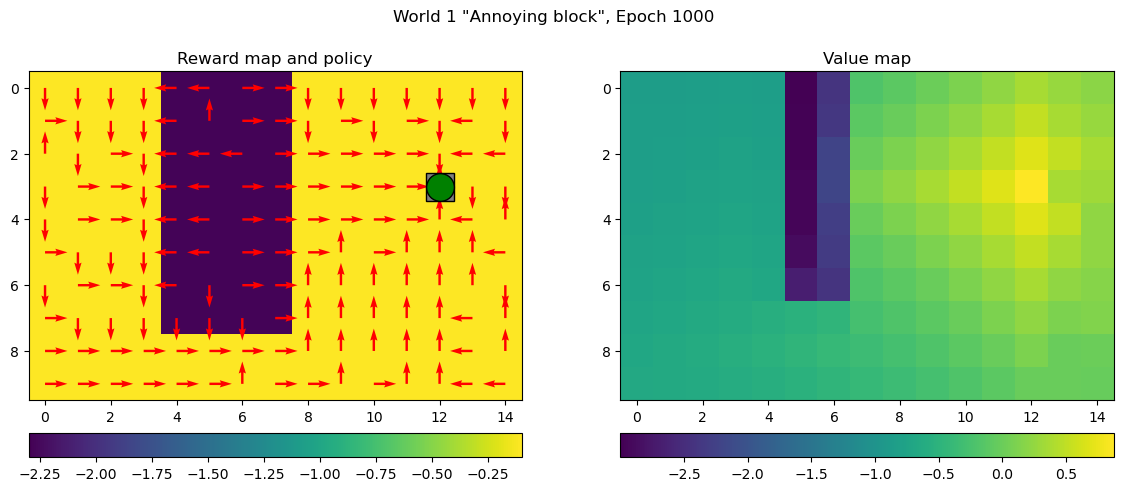

In [8]:
W1 = GridWorld(1)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q1 = QLearning(W1, params={"LR": 0.5, "Gamma": 0.9, "Eps": 0.1, "Epochs": 1000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

Don't forget to run a few tests with the optimized policy to see if the solution looks reasonable.

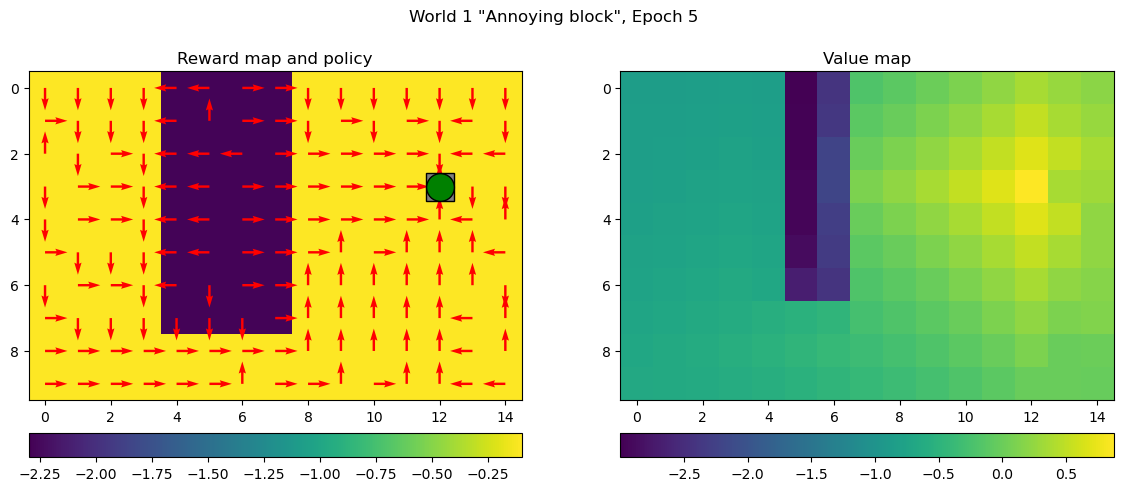

In [9]:
QLearningTest(W=W1, Q=Q1, params={"Epochs": 5, "MaxSteps": 100})

#### **<span style="color:red">Question 2:</span>**
1. Describe World 1.
2. What is the goal for the agent in this world?
3. What is a good choice of learning rate in this world? Motvate your answer.

#### **<span style="color:green">Answer:</span>**
\[ 
1. World 1 is a fairly easy map without any tricks and large error pool in the middle. 
2. The goal of the agent (the grey square) is to get to the green circle through finding an optimal path and minimizing the negative rewards.
3. The good starting value seemed to be 0.5 (which we believe is a good solution). This is due to balancing between relying on the already learned experience and also learning new information at the same time, given that the map is static.
\]

Now continue optimizing worlds 2-4. Note that the optimal hyperparmeters potentially are very different for each world.

### **3.2 GridWorld 2**

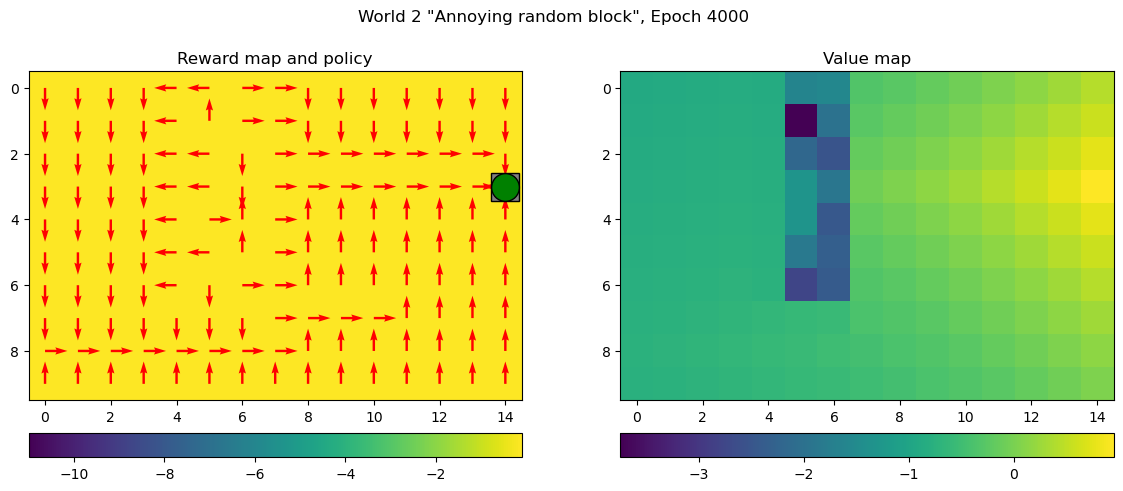

In [23]:
W2 = GridWorld(2)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q2 = QLearning(W2, params={"LR": 0.1, "Gamma": 0.9, "Eps": 0.9, "Epochs": 4000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

Don't forget to run a few tests with the optimized policy to see if the solution looks reasonable.

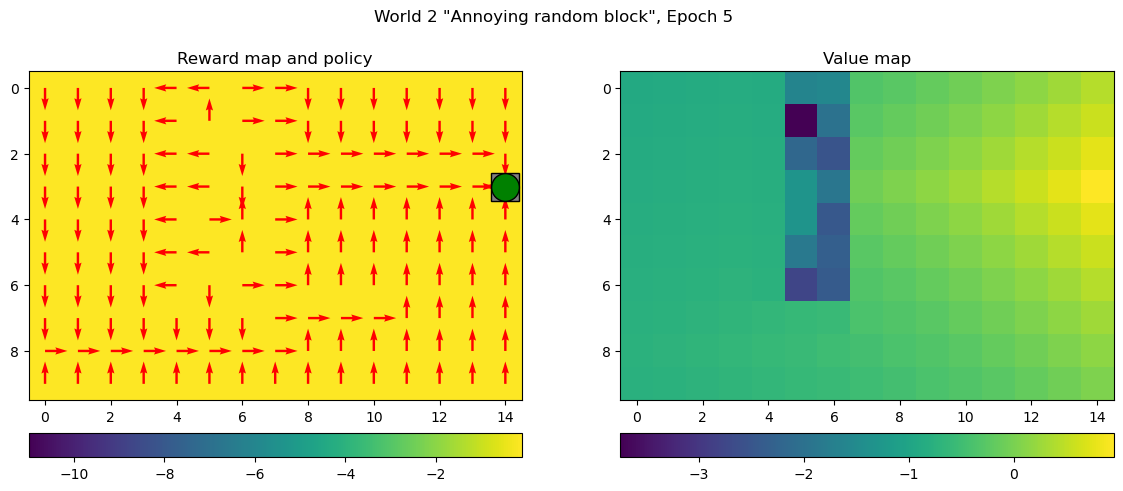

In [24]:
QLearningTest(W=W2, Q=Q2, params={"Epochs": 5, "MaxSteps": 100})

#### **<span style="color:red">Question 3:</span>**
1. Describe World 2.
2. This world has a hidden trick. Describe this trick and why this can be solved with reinforcement learning.
3. What is the goal for the agent in this world?
4. What is a good choice of learning rate in this world? Motvate your answer.
5. Compared to the optimal policy in World 1, how do we expect the optimal policy to look in this world? Motivate your answer.

#### **<span style="color:green">Answer:</span>**
\[ 
1. World 2 is similar to World 1, in which the large error pool occasionally shows up else the world has the lowest constant error.
2. The trick is that the World 2 changes as described in earlier. The agent can identify that there may be a risk of getting the largest negative reward (due to the flashing large error pool) by taking a shortest path to the goal. The reinforcement learning can learn from the previous occurences of the large error pool and therefore, recalls the similar path as in World 1.
3. The goal of the agent (the grey square) is to get to the green circle through finding an optimal path and minimizing the negative rewards while avoiding and identifying the possible risks.
4. We wanted to have lower learning rate in order to remember the purple pool and try to avoid it. When we have low learning rate, the already learned path (old values) have more impact on the updated Q values. In addition the new estimate have less impact on the updated Q values. Therefore, having lower learning rate recalls the values of the purple pool. 
By also having high exploration rate the agent will make random movement in order to explore and find a better policy.
5. It should be the same, as going through the large pool will result in the large negative error and the agent does not want to risk it.
\]

### **3.3 GridWorld 3**

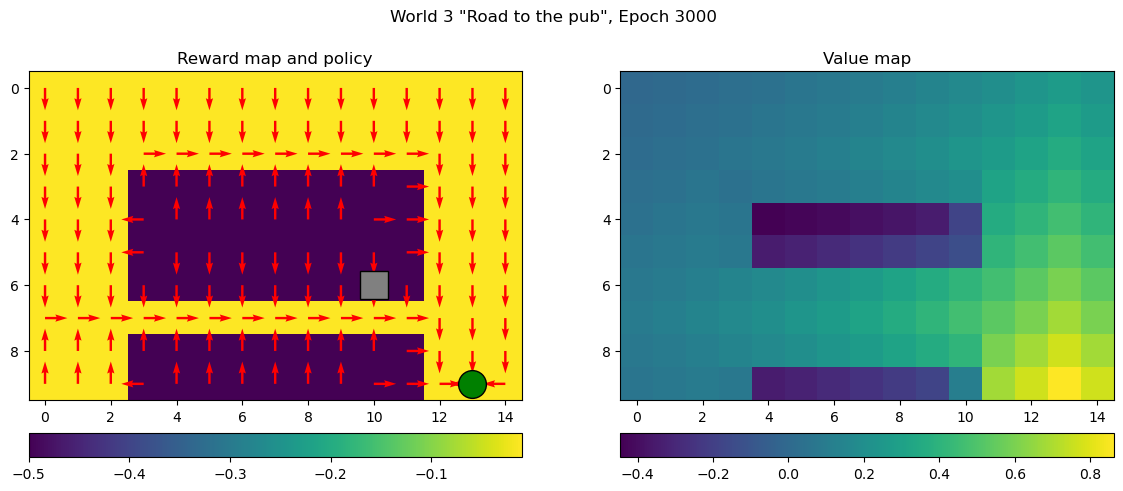

In [12]:
W3 = GridWorld(3)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q3 = QLearning(W3, params={"LR": 0.9, "Gamma": 0.9, "Eps": 0.8, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

Don't forget to run a few tests with the optimized policy to see if the solution looks reasonable.

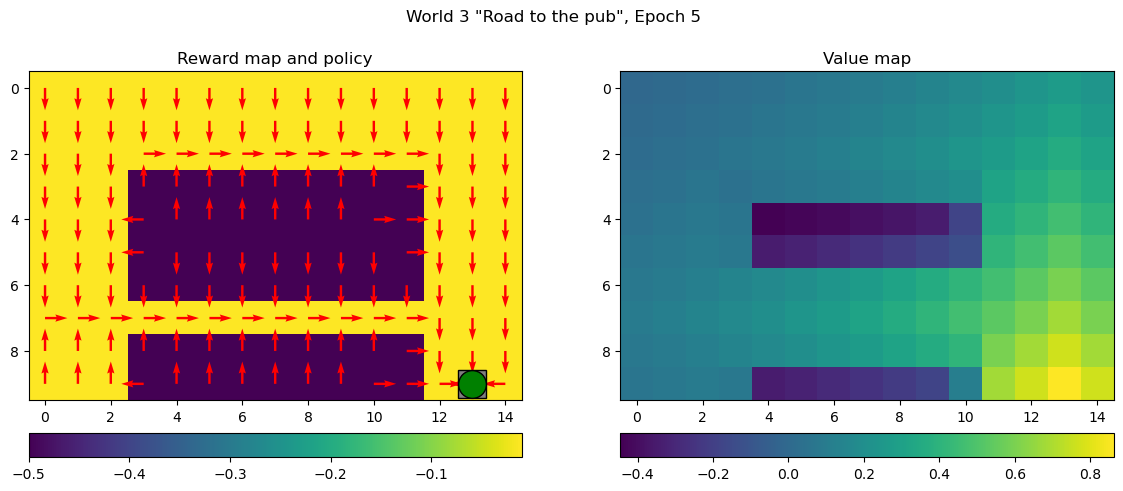

In [13]:
QLearningTest(W=W3, Q=Q3, params={"Epochs": 5, "MaxSteps": 100})

#### **<span style="color:red">Question 4:</span>**
1. Describe World 3.
2. From the perspective of the learning algorithm, how does this world compare to World 1?
3. What is the goal for the agent in this world?
4. Is it possible to get a good policy in every state in this world? If so, which hyperparameter is particulary important to acheive this?

#### **<span style="color:green">Answer:</span>**
\[ 
1. World 3 is a bay with bridge, where the bridge can be seen as a shortcut.
2. This world has larger area of the purple pool and there are two ways in which the annoying block can find its way to the goal. Taking the bridge is a shorter way to get to the goal which will minimize the negative rewards. World 1 had a number of alternative routes, however, this one has primarily two routes and the algorithm will try to avoid the large negative error pool without trying to remember any hidden tricks as there are none (as in World 1)
3. The goal of the agent (the grey square) is to get to the green circle through finding an optimal path and minimizing the negative rewards. Depending on the agents starting point, it will find the shortest path through the bridge or go around in order to minimize the negative rewards.
4. For World 3 it is important to have high learning rate and high exploration factor. With average exploration factor and high learning rate the upper left corner would create a loop (unclear path). The learning rate was required to be high in order to have more optimal and clean path. 
\]

### **3.4 GridWorld 4**

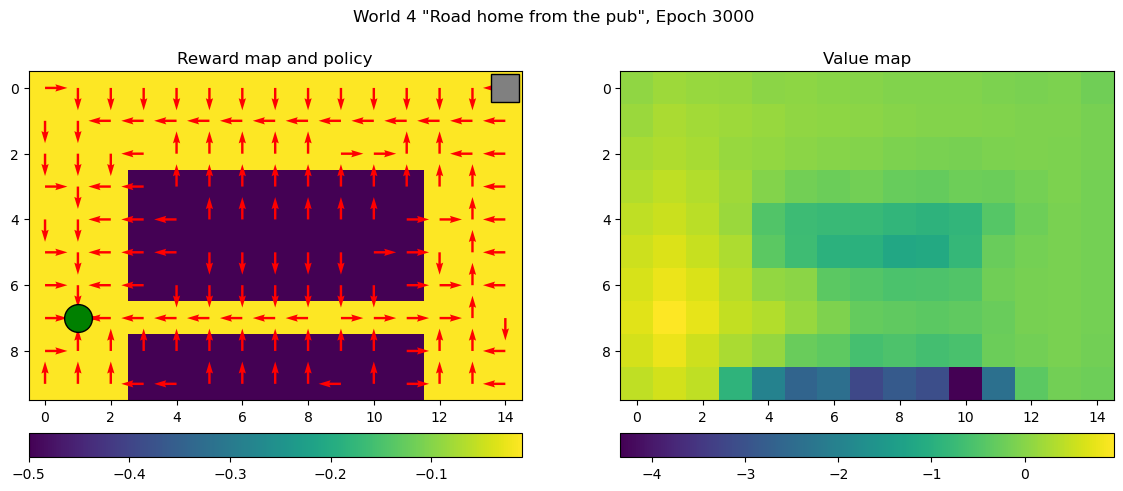

In [14]:
W4 = GridWorld(4)

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q4 = QLearning(W4, params={"LR": 0.05, "Gamma": 0.9, "Eps": 0.99, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

Don't forget to run a few tests with the optimized policy to see if the solution looks reasonable. **Important**: You might think the policy above looks bad, but we encourage you to run this test even if you think it's not optimal. It might give you some insight into the world behaviour.

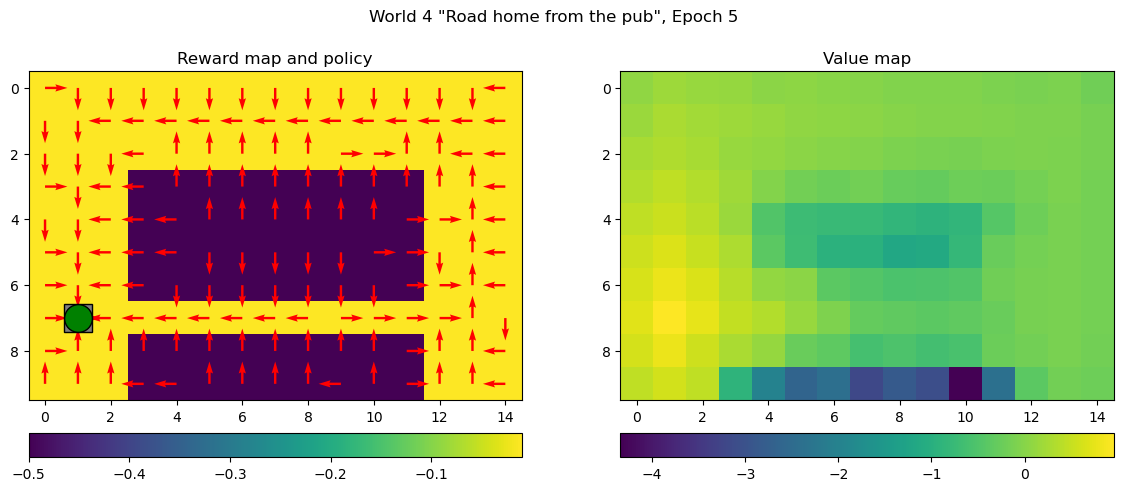

In [15]:
QLearningTest(W=W4, Q=Q4, params={"Epochs": 5, "MaxSteps": 100})

#### **<span style="color:red">Question 5:</span>**
1. Describe World 4 using your own words. 
2. This world has a hidden trick. What is it, and how does this world differ from World 3?
3. What is the goal for the agent in this world?
4. What is a good choice of learning rate in this world? Motvate your answer.
5. How should we expect the optimal policy too look like? In other words, what is the optimal path from start to goal in this world? Motivate your answer.

#### **<span style="color:green">Answer:</span>**
\[ 
1. Similar to World 3 with a hidden trick that makes random moves and different location of the green circle. 
2. The hidden trick is that the agent makes random actions not dependent on the policy. In this world, the agent can slightly against the policy. This makes the agent take a non-optimal/non-risky path in order to not fall into the pool. As it can be seen in the policy, the arrows close to the wall/pool points more towards the middle and the bridge is avoided.
3. The goal of the agent (the grey square) is to get to the green circle through finding the safest path and minimizing the negative rewards. Depending on where the agent starts the journey, it will find the safest path, and avoid the bridge where there are more risks of falling in to the large negative error pool. It would rather go around with some distance away from the walls and the pool.
4. We have used low learning rate of 0.05. By having low learning rate, the agent will put more emphasis on the already learned path and can therefore avoid the risks of falling into the pool.
5. The Drunk Model - High exploration rate of 0.99, low learning rate of 0.05 and discount factor as 0.9. We want it to explore paths and understand how the trick impacts the agent. Thereafter, we want the agent to remember the safest/optimal path, as the shortest path involves risk of falling into the pool or hitting the wall (Which has a penalty).

 \]

---
## **4. Investigating the effects of hyperparameters**
You will now design a series of experiments to show the impact of the three main hyperparameters - learning rate, discount factor, and exploration rate - in different environments. You are free to extend the experiments as you see fit in order to make your point in the discussions, but a recommended strategy is to try two extreme cases (low vs high values). For each parameter, there is one world in particular of the four you have already used where it is easy to show the effects we are looking for. Figuring out which worlds is part of the excercise.

### **4.1 Learning rate**

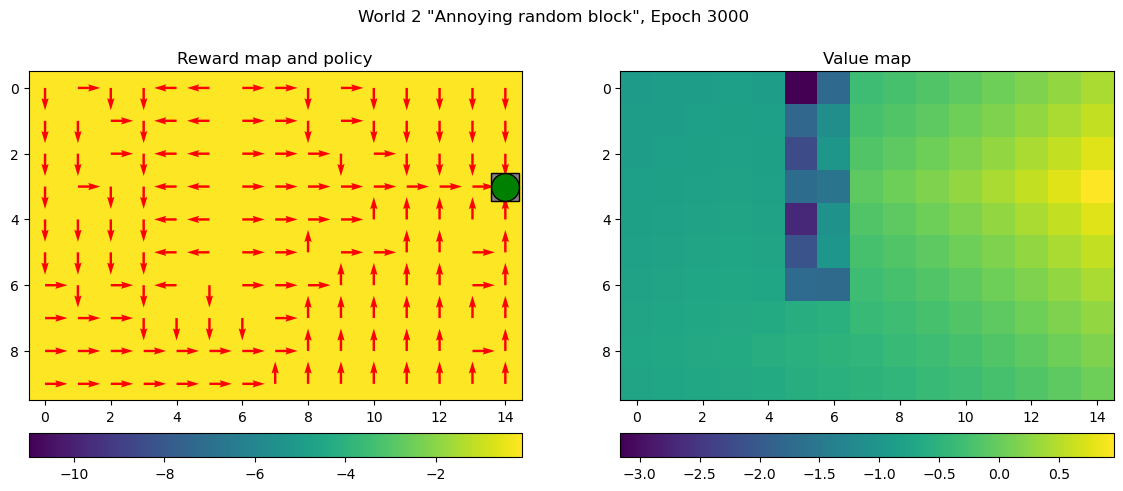

In [33]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

W_LR = GridWorld(2)
Q_41_L = QLearning(W_LR, params={"LR": 0.05, "Gamma": 0.9, "Eps": 0.99, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

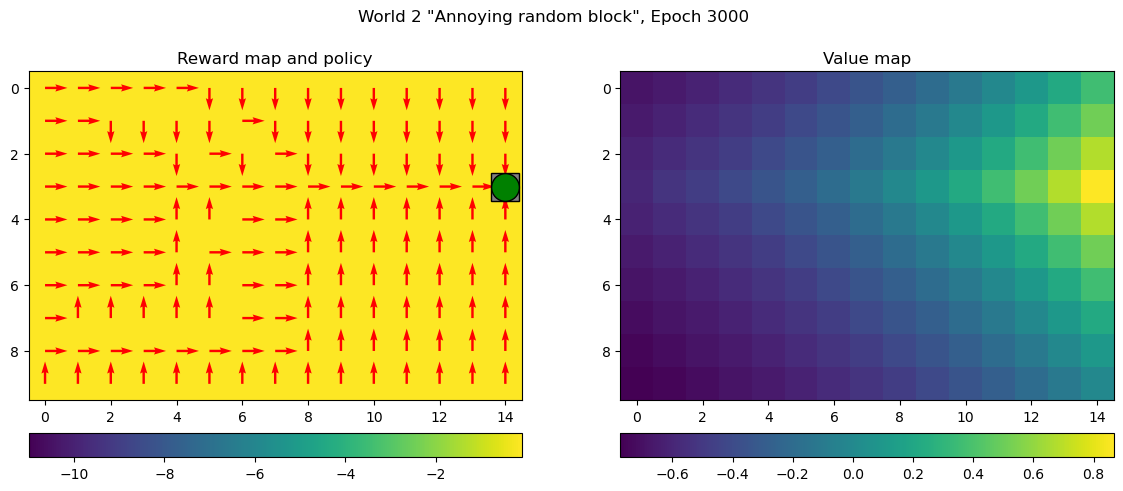

In [34]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q_LR_H = QLearning(W_LR, params={"LR": 0.95, "Gamma": 0.9, "Eps": 0.99, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

#### **<span style="color:red">Question 6:</span>**
Explain your experiment and results, and why you choose this world (your answers should be based on the output of the cells above).

#### **<span style="color:green">Answer:</span>**
\[ For this case we have tried low learning rate of 0.05 and high learning rate of 0.95. The discount factor and the exploration factor was set to 0.90 and 0.99 respectively. We have decided to use World 2 as it clearly shows the impact that are represented by low learning and high learning rate. 
In the case where the learning rate is low, the policy is optimal with the shortest path.
As it can be seen in the case for high learning rate, the policy shows that the agent should go straight through the pool (Which as we may know it can result in getting high negative score).
\]

### **4.2 Discount factor (gamma)**

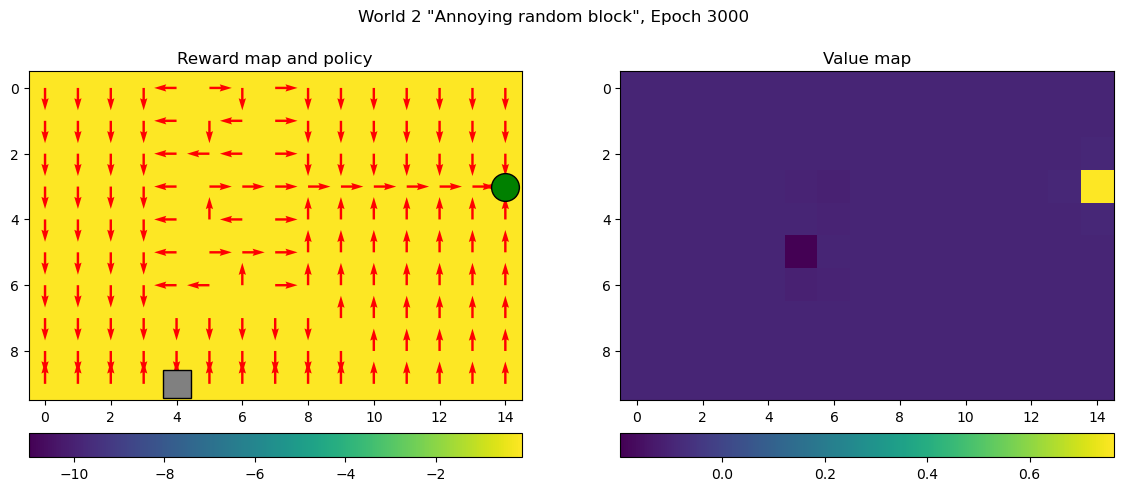

In [18]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

W_DF = GridWorld(2)
Q_DF_L = QLearning(W_DF, params={"LR": 0.9, "Gamma": 0.01, "Eps": 0.5, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

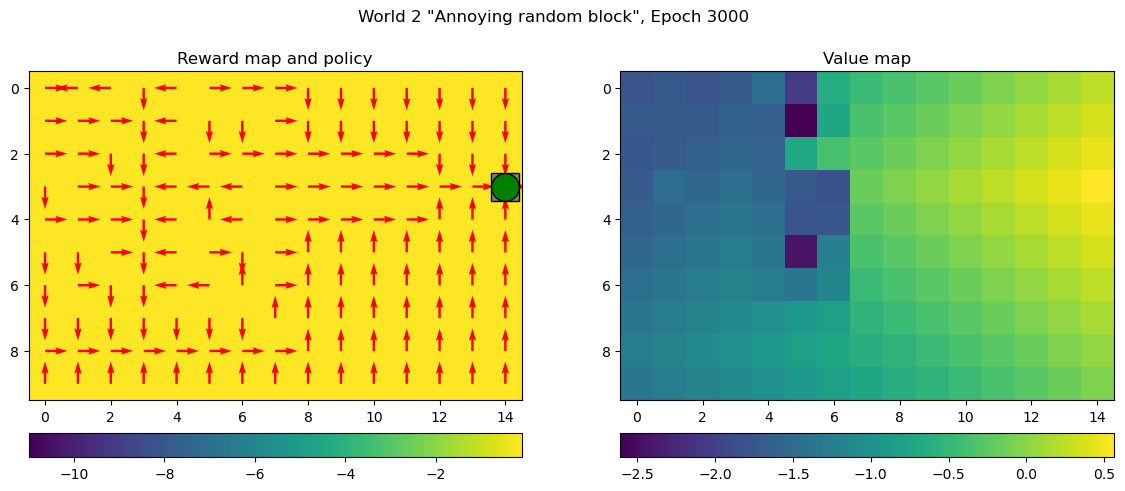

In [19]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q_DF_H = QLearning(W_DF, params={"LR": 0.9, "Gamma": 0.99, "Eps": 0.5, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

#### **<span style="color:red">Question 7:</span>**
Explain your experiment and results, and why you choose this world (your answers should be based on the output of the cells above).

#### **<span style="color:green">Answer:</span>**
\[ For this experiment we have used high value of discount factor (0.99) and low value of discount factor (0.01) with learning rate of 0.9 and exploration factor of 0.5.
We have experimented with different worlds and in this case the discrepancies were most evident.
For high values of the discount factor, the path is mostly optimal, there are some issus in the upper left corner where the agent may get stuck.
With comparison to the low values of discount factor, the agent would get stuck in half left of the map.
It would seem that the path to the goal would have less rewards for the agent and therefore, the agent would rather take the short term rewards. The loop in the policy can be due to the wall and the purple pool as both of them give a negative reward.
As described earlier, going into the wall gives a large negative reward (as this is how we have designed the reward function for hitting the wall in order to avoid the agent taking long paths/going through the edge to the goal).

\]

### **4.3 Exploration rate (epsilon)**

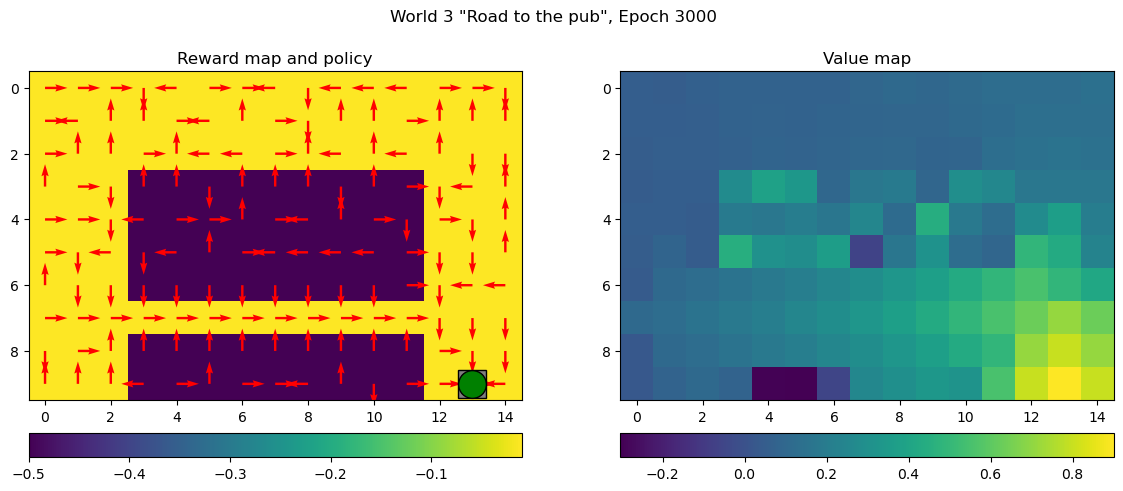

In [39]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
W_ER = GridWorld(3)
Q_ER_L = QLearning(W_ER, params={"LR": 0.90, "Gamma": 0.9, "Eps": 0.05, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

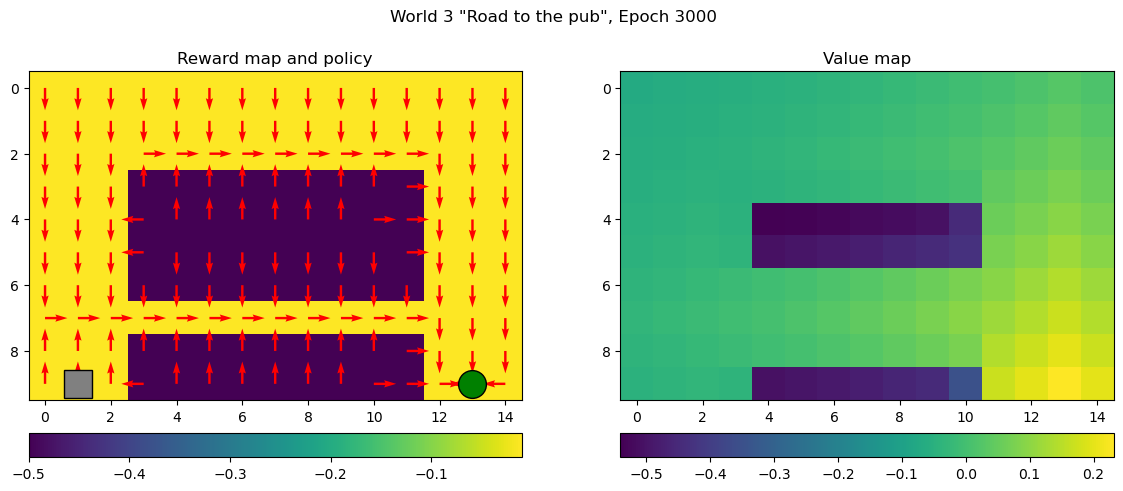

In [40]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

Q_ER_H = QLearning(W_ER, params={"LR": 0.90, "Gamma": 0.9, "Eps": 0.95, "Epochs": 3000, "MaxSteps": 200, "DrawInterval": 100})

# ============================================

#### **<span style="color:red">Question 8:</span>**
Explain your experiment and results, and why you choose this world (your answers should be based on the output of the cells above).

#### **<span style="color:green">Answer:</span>**
\[ For this experiment we chosen world 3. We have used high value of exploration factor (0.95) and low value of exploration factor (0.05) with learning rate of 0.9 and discount factor of 0.9.
For high values of the exploration factor, the path is optimal. With comparison to the low values of the exploration factor, the agent will be stuck in most parts of the map.
\]

---
## **5. Optional worlds**

You have now investigated the four most important GridWorlds in the lab, but we have also created some optional worlds (numbers 5 to 7) which you can try to solve. There is also World 8, but that is a special case, so scroll down a few cells if you are interested. Here is a brief description of World 5 to 7:
- World 5, Warpspace: As the name suggests, in this world there is one tile in which the agent enters warpspace and imediatly moves to another specific location. How do you think this will affect the learning?
- World 6, Torus: In this world, the opposite edges are connected together like a rolled-up paper. If you connect both the up-down and left-right edges, you get a mathematical shape called a torus which has no edges. This means that the closest path to the goal might not be obvious anymore.
- World 7, Steps: This world is a staircase of increasing rewards (although still all negative). However, moving up the stairs towards higher rewards also puts the agent further from the goal. So what is the optimal choice, to go for the long path with higher rewards, or to sprint throught the low rewards towards the goal. This depends on the value of gamma.

In [22]:
WOpt = GridWorld( ??? )
QOpt = QLearning(WOpt, {"LR": 0.99, "Gamma": 0.9, "Eps": 0.9, "Epochs": 1000, "MaxSteps": 200, "DrawInterval": 100})

SyntaxError: invalid syntax (2440256993.py, line 1)

In [ ]:
QLearningTest(W=WOpt, Q=QOpt, params={"Epochs": 5, "MaxSteps": 100})

### **5.1: World 8**

So far, every world has been a 2D-grid (y and x dimensions), and the four actions have been the same in every world. It has therefore been possible to write the code with this in mind, probably resulting in code where you index Q for example with `Q[s[0], s[1], a]` for a given state `s` and action `a`. However, it is possible to slightly rewrite the code to be independent of the number of dimensions in the state space, which means that we can then explore much more interesting worlds. It is also a nice excercise in how to write code that is general and modular. The way to do this is to index Q in the following way: `Q[(*s,a)]`. It's perfectly fine if you want to consider this as "python magic", but for the interested here is an explaination.

The state `s` is a tuple, for example `(3,6)`. A quirk in python is that tuples can be used to index into arrays, with each value in the tuple indexing separate dimensions in the array. For example, if Q is a 10x15x4 array, then `Q[(3,6)]` will return the vector of four values in Q that are in the 3rd row and 6th column (i.e. all the action values for state `s = (3,6)`). The problem is that we want to access the Q-value of a specific action when updating with a new reward. One might assume that `Q[s,a]` would work, but this now works differently since we explicitly index Q with not only a tuple. The solution is to remake a tuple that contains both `s` and `a`, and then index Q with this. We can do this by first unpacking the state tuple by calling `*s`, then creating a new tuple with `(*s,a)`, containing both the state and action. For example, if `s = (3,6)` and `a = 2`, then `(*s,a) = (3,6,2)`. We then use this tuple to index into Q as `Q[(*s,a)]`.

With this change to the implementation, we can for example extend the world to a 3D-grid, and your code should work the same. Let's try it in World 8, where the agent has the choice of moving between two floors of the map. This is shown as diagonal up or diagonal down arrows.

In [ ]:
W8 = GridWorld(8)
Q8 = QLearning(W8, {"LR": 0.99, "Gamma": 0.9, "Eps": 0.9, "Epochs": 1000, "MaxSteps": 200, "DrawInterval": 100})

In [ ]:
QLearningTest(W=W8, Q=Q8, params={"Epochs": 5, "MaxSteps": 100})